# Assessment of in-batch variability of developmental speed based on Twin Network developmental stage prediction

# Table of Contents
* [General](#first-bullet)
* [Load paths](#second-bullet)
* [Load model](#third-bullet)
* [Calculate embeddings](#fourth-bullet)
* [Calculate similarities](#fifth-bullet)
* [(Optional) Save embeddings and similarities](#sixth-bullet)
* [Plot distribution of predicted stages](#seventh-bullet)

## General <a class="anchor" id="first-bullet"></a>

General imports and class definitions

In [1]:
%load_ext autoreload
%autoreload 2

Load paths from config file

In [2]:
from twinnet_tools.tnconfig import ProjectConfig

config = ProjectConfig("twinnet_config")

In [3]:
dir_root_data = config.json["dir_data"]
dir_root_scripts = config.json["dir_scripts"]
paths_anchor = config.json["paths_json_reference_src_imgs_1"]
path_model_zebrafish = config.json["dir_model_zebrafish_more_data"]

config_paths_script = config.json["Similarities_variability_predicted_developmental_stages_variability"]
dir_data_src = config_paths_script["dir_data_src"]
path_src_data_test_json = config_paths_script["path_src_data_test_json"]
path_dst = config_paths_script["dir_data_dst"]

Import Python packages

In [4]:
import glob
import matplotlib as mpl
import numpy as np
import pandas as pd
from pathlib import Path
import sys

sys.path.append(dir_root_scripts)
from twinnet_tools.tngeneral import TNToolsGeneral
from twinnet_tools.tninference import TNToolsEmbeddings
from twinnet_tools.tninference import TNToolsPaths
from twinnet_tools.tninference import TNToolsSimilarities
from twinnet_tools.tnmodel import TNToolsNetwork
from twinnet_tools.tnplot import TNToolsPlot

Prepare class instances

In [5]:
tools_general = TNToolsGeneral()
tools_embeddings = TNToolsEmbeddings(size_img=224, size_img_min=300)
tools_model = TNToolsNetwork()
tools_paths = TNToolsPaths()
tools_similarities = TNToolsSimilarities()
tools_plot = TNToolsPlot()

Adjust matplotlib parameters to save plots as .svg files.

In [6]:
new_rc_params = {'text.usetex': False,
                'svg.fonttype': 'none'}
mpl.rcParams.update(new_rc_params)

## Load paths <a class="anchor" id="second-bullet"></a>

Load reference data paths

In [7]:
paths_anchor_1_relative = tools_general.fn_json_load(paths_anchor["json_anchor_1"])
paths_anchor_2_relative = tools_general.fn_json_load(paths_anchor["json_anchor_2"])
paths_anchor_3_relative = tools_general.fn_json_load(paths_anchor["json_anchor_3"])

paths_anchor_1 = [f"{dir_root_data}/twinnet_data/{p[2:]}".replace('//', '/') for p in paths_anchor_1_relative]
paths_anchor_2 = [f"{dir_root_data}/twinnet_data/{p[2:]}".replace('//', '/') for p in paths_anchor_2_relative]
paths_anchor_3 = [f"{dir_root_data}/twinnet_data/{p[2:]}".replace('//', '/') for p in paths_anchor_3_relative]

paths_imgs_reference = {1: paths_anchor_1,
                        2: paths_anchor_2, 
                        3: paths_anchor_3}

Specify path to test data

In [8]:
embryos_normal = [f"{dir_data_src}/{p[2:]}".replace('//', '/') 
                  for p in sorted(tools_general.fn_json_load(
                      path_src_data_test_json)['normal_bright_complete'])
                 ]

Load paths of test embryos images sorted by image indices

In [9]:
images_embryos = tools_paths.dirs_to_images_sort_indices(embryos_normal)

[INFO] Number of timepoints/images: 360/77        


Specifiy directory to save output files to

In [10]:
dir_dst_embeddings = f"{path_dst}/embeddings"
dir_dst_similarities = f"{path_dst}/similarities"

In [11]:
dir_dst_embeddings_path = Path( dir_dst_embeddings )
dir_dst_embeddings_path.mkdir(parents=True, exist_ok=True)
dir_dst_similarities_path = Path( dir_dst_similarities )
dir_dst_similarities_path.mkdir(parents=True, exist_ok=True)

## Load model <a class="anchor" id="third-bullet"></a>

In [13]:
tn_model_embedding = tools_model.tn_embedding_load(path_model_zebrafish)

## Calculate embeddings <a class="anchor" id="fourth-bullet"></a>

Reference embeddings

In [14]:
embeddings_reference = dict()
embeddings_reference[1] = tools_embeddings.list_to_embeddings(paths_imgs_reference[1], tn_model_embedding)
embeddings_reference[2] = tools_embeddings.list_to_embeddings(paths_imgs_reference[2], tn_model_embedding)
embeddings_reference[3] = tools_embeddings.list_to_embeddings(paths_imgs_reference[3], tn_model_embedding)

[DONE][Embeddings] 0018/0018                      
[DONE][Embeddings] 0018/0018                      
[DONE][Embeddings] 0018/0018                      


Test embeddings

In [15]:
embeddings_tp_000 = tools_embeddings.list_to_embeddings_keep_order(images_embryos[0], tn_model_embedding)
embeddings_tp_100 = tools_embeddings.list_to_embeddings_keep_order(images_embryos[100], tn_model_embedding)
embeddings_tp_200 = tools_embeddings.list_to_embeddings_keep_order(images_embryos[200], tn_model_embedding)

[DONE][Embeddings] 0004/0004                      
[DONE][Embeddings] 0004/0004                      
[DONE][Embeddings] 0004/0004                      


In [17]:
embeddings_test = dict()

Loop through all test dataset sequence indices and calculate embeddings

In [18]:
for k_tp, v_tp in images_embryos.items():
    print(f"[INFO][Embeddings] {k_tp + 1}/{len(images_embryos.keys())}".ljust(50))
    embeddings_test[k_tp] = tools_embeddings.list_to_embeddings_keep_order(v_tp, tn_model_embedding)

[INFO][Embeddings] 1/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 2/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 3/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 4/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 5/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 6/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 7/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 8/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 9/360                          
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 10/360                         
[DONE][Embeddings] 0004/0004   

[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 82/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 83/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 84/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 85/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 86/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 87/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 88/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 89/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 90/360                         
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 91/360      

[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 242/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 243/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 244/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 245/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 246/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 247/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 248/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 249/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 250/360                        
[DONE][Embeddings] 0004/0004                      
[INFO][Embeddings] 251/360     

## Calculate similarities <a class="anchor" id="fifth-bullet"></a>

Calculate similarities for all embryos in batch at specified series indices.

In [19]:
similarities_tp_000, median_values_000 = tools_similarities.cosine_similarities_in_batch_reference(
    embeddings_test[0], embeddings_reference)
similarities_tp_100, median_values_100 = tools_similarities.cosine_similarities_in_batch_reference(
    embeddings_test[100], embeddings_reference)
similarities_tp_200, median_values_200 = tools_similarities.cosine_similarities_in_batch_reference(
    embeddings_test[200], embeddings_reference)

Number of combinations:  231
Number of similarities:  231
Number of combinations:  231
Number of similarities:  231
Number of combinations:  231
Number of similarities:  231


Loop through all test dataset sequence indices and calculate similarities

In [20]:
similarities_test = dict()
median_values_test = dict()

In [22]:
for k_tp, v_tp in embeddings_test.items():
    print(f"[INFO][Embeddings] {k_tp + 1}/{len(images_embryos.keys())}".ljust(50))
    similarities, median_values = tools_similarities.cosine_similarities_in_batch_reference(
        v_tp, embeddings_reference)
    similarities_test[k_tp] = similarities
    median_values_test[k_tp] = median_values

[INFO][Embeddings] 1/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 2/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 3/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 4/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 5/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 6/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 7/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 8/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 9/360                          
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 

Number of similarities:  231
[INFO][Embeddings] 77/360                         
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 78/360                         
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 79/360                         
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 80/360                         
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 81/360                         
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 82/360                         
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 83/360                         
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 84/360                         
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 85/360                         
Number of combinations:  231
Number of similarit

Number of similarities:  231
[INFO][Embeddings] 153/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 154/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 155/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 156/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 157/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 158/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 159/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 160/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 161/360                        
Number of combinations:  231
Number of similarit

Number of similarities:  231
[INFO][Embeddings] 229/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 230/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 231/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 232/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 233/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 234/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 235/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 236/360                        
Number of combinations:  231
Number of similarities:  231
[INFO][Embeddings] 237/360                        
Number of combinations:  231
Number of similarit

Number of similarities:  216
[INFO][Embeddings] 305/360                        
Number of combinations:  216
Number of similarities:  216
[INFO][Embeddings] 306/360                        
Number of combinations:  216
Number of similarities:  216
[INFO][Embeddings] 307/360                        
Number of combinations:  216
Number of similarities:  216
[INFO][Embeddings] 308/360                        
Number of combinations:  216
Number of similarities:  216
[INFO][Embeddings] 309/360                        
Number of combinations:  216
Number of similarities:  216
[INFO][Embeddings] 310/360                        
Number of combinations:  216
Number of similarities:  216
[INFO][Embeddings] 311/360                        
Number of combinations:  216
Number of similarities:  216
[INFO][Embeddings] 312/360                        
Number of combinations:  213
Number of similarities:  213
[INFO][Embeddings] 313/360                        
Number of combinations:  213
Number of similarit

## (Optional) Save embeddings and similarities <a class="anchor" id="sixth-bullet"></a>

Save embeddings

In [24]:
# In order to save the embeddings to a JSON file,
# we have to convert each numpy array to list
embeddings_savable = {
    _k_tp: {
        _k_emb: _v_emb.tolist()
    for _k_emb, _v_emb
    in _v_tp.items()
    }
    for _k_tp, _v_tp
    in embeddings_test.items()
}

In [25]:
# Save embeddings
for _k_tp, _v_tp in embeddings_savable.items():
    print(f"{_k_tp + 1}".zfill(4), end='\r')
    tools_general.fn_json_write(_v_tp,
                                f"{dir_dst_embeddings}/embeddings_tp{str(_k_tp + 1).zfill(4)}.json")

Load embeddings

In [26]:
# Load embeddings
paths_embeddings = list(sorted(glob.glob(
    f"{dir_dst_embeddings}/"
    f"embeddings*.json")))
embeddings_loaded = dict()

for i in range(len(paths_embeddings)):
    print(f"{i + 1}".zfill(4), end='\r')
    content = tools_general.fn_json_load(paths_embeddings[i])
    embeddings_loaded[i] = content
    
print(f"Loaded from {dir_dst_embeddings}")

Loaded from ./outputs_developmental_stages_variability2//embeddings


Save similarities

In [29]:
# The similarities dictionary already has lists as values,
# however, lists are with floats and not JSON serializable.
# Therefore, convert each list of similarities to a numpy
# array and back to a list.
similarities_savable = {
    _k_tp: [
        np.array(list_one_emb_sims).tolist()
        for list_one_emb_sims
        in _v_tp
    ]
    for _k_tp, _v_tp
    in similarities_test.items()
}

median_values_test_savable = {
    _k_tp: [
        np.array(list_one_emb_sims).tolist()
        for list_one_emb_sims
        in _v_tp
    ]
    for _k_tp, _v_tp
    in median_values_test.items()
}

In [30]:
# Save similarities
for _k_tp, _v_tp in similarities_savable.items():
    print(f"{_k_tp + 1}".zfill(4), end='\r')
    tools_general.fn_json_write(_v_tp, f"{dir_dst_similarities}/similarities_tp{str(_k_tp + 1).zfill(4)}.json")

# Save median values
for _k_tp, _v_tp in median_values_test_savable.items():
    print(f"{_k_tp + 1}".zfill(4), end='\r')
    tools_general.fn_json_write(_v_tp, f"{dir_dst_similarities}/median_values_tp{str(_k_tp + 1).zfill(4)}.json")

Load similarities

In [31]:
paths_similarities = list(sorted(glob.glob(
    f"{dir_dst_similarities}/similarities_tp*.json")))
similarities_loaded = dict()

for i in range(len(paths_similarities)):
    print(f"{i + 1}".zfill(4), end='\r')
    content = tools_general.fn_json_load(paths_similarities[i])
    similarities_loaded[i] = content
    
print(f"Loaded from {dir_dst_similarities}")

Loaded from ./outputs_developmental_stages_variability2//similarities


In [32]:
paths_median_values = list(sorted(glob.glob(
    f"{dir_dst_similarities}/median_values_tp*.json")))
median_values_loaded = dict()

for i in range(len(paths_median_values)):
    print(f"{i + 1}".zfill(4), end='\r')
    content = tools_general.fn_json_load(paths_median_values[i])
    median_values_loaded[i] = content
    
print(f"Loaded from {dir_dst_similarities}")

Loaded from ./outputs_developmental_stages_variability2//similarities


## Plot distribution of predicted stages<a class="anchor" id="seventh-bullet"></a>

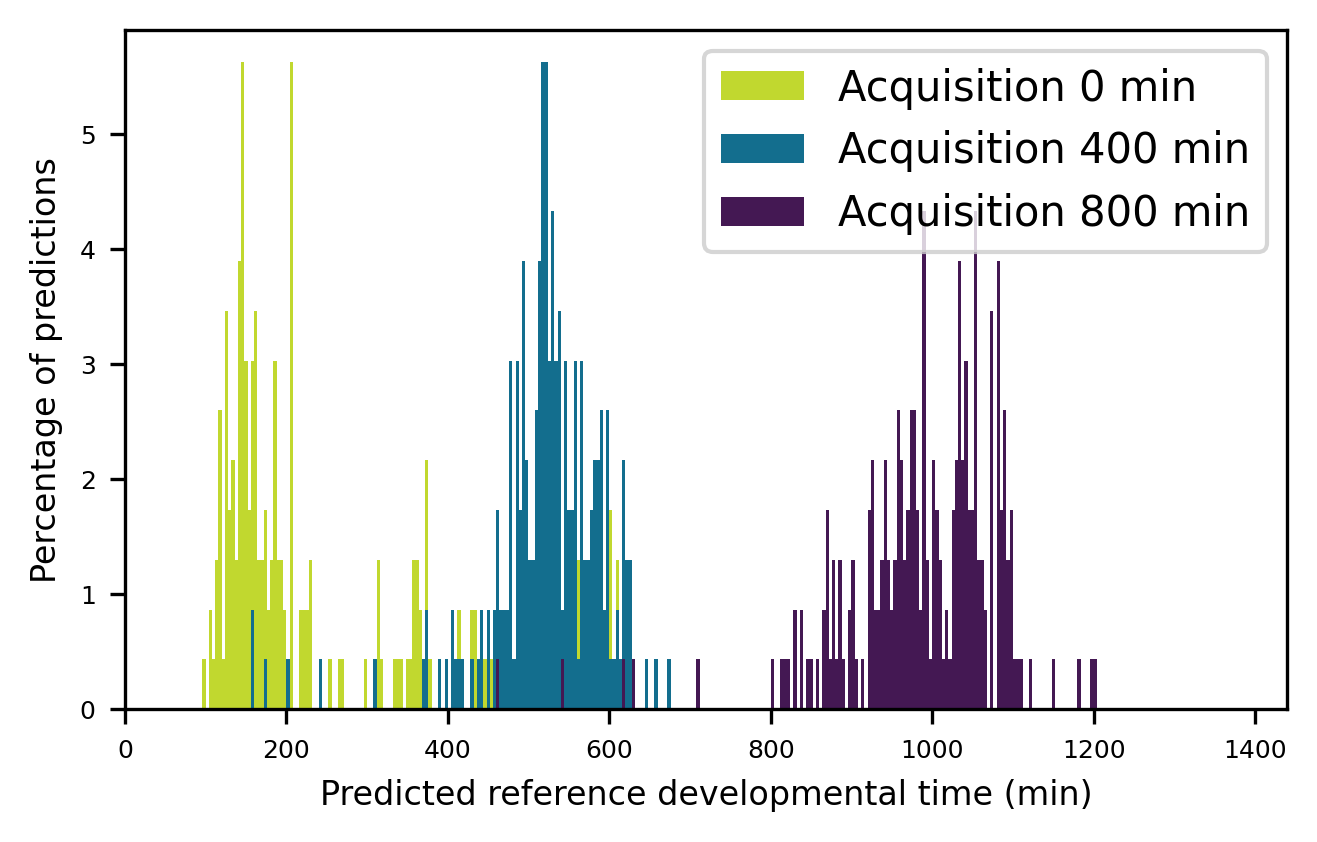

In [33]:
tools_plot.plot_distribution_stages_dev_fractions(
    [median_values_test[0], median_values_test[100], median_values_test[200]],
    len(paths_imgs_reference[1]),
    [(193/255, 216/255, 47/255), (19/255, 110/255, 142/255), (68/255, 24/255, 83/255)],
    ['Acquisition 0 min', 'Acquisition 400 min', 'Acquisition 800 min'],
    path_save=f"{path_dst}/developmental_stages_variability.svg")